#### CMSE 202 Honors Project
### &#9989; Aniessa Terpstra
### &#9989; Section_003
#### &#9989; 04/10/2022

# ___Modeling the retirement funds of a neighborhood___

## Background and Motivation

For this porject I wanted to look at retirement funds. We all know that retrieing is stressful and therefore we try to plan for it by saving ahead of time. Because of this, we have money that appears to be laying around, and sometimes we have to take out money from our retirement fund. For example, we could become unemployed, and the only money that we have readily available is our retirement fund. For this project I want to see what effect that has. I will be looking at things such as being unemployed, going through a divorce, and buying a house. These things can all effect your retirement fund if you decide to withdrawl from it. 

The questions I am going to look at is which of the three situations (buying a house, divorce, or being unemployed) has the most affect? Time deffinetly plays a roll in this as well, but at what points does time become critical? What makes it so critical at that point?

## Methodology

In [9]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import networkx as nx

In [51]:
class retirement():
    '''This class is going to model a retirement fund over time depending on different life situations. Currently this 
    class takes into account divorce, buying a house, and being unemployed for a period of time. '''
    def __init__(self,start,rate,years,salary,percentage):
        """this function initializes the object and takes in...
        start: The begginging amount in the reitrement fund
        rate: The interest rate of the savings account that the money is in
        years: How long someone has been saving for the fund
        salary: Their starting salary
        Perecentage: The percentage of their income they are willing to put away each year."""
        
        self.start = start
        self.rate = rate
        self.years = years
        self.salary = salary
        self.percentage = percentage
        self.contributions = []
        self.time = []
        self.retirement = []
        
    def plot(self):
        """This function is going to plot out the retirement fund with time on the x and the fund on the y."""
        
        plt.plot(self.time,self.retirement,label = round(self.retirement[len(self.retirement)-1]))
        plt.xlabel("Time")
        plt.ylabel("Retirement Fund $")
        
    def update_salary(self):
        """This function updates the salary so that it increases by 3%. That is the 
        normal raise that american get each year."""
        
        self.salary += self.salary*.03
        
    def get_contributions(self):
        """This function is going to create list of contributions that someone is going to put towards their
        retirement fund each year."""
        
        for i in range(self.years):
            add = self.salary*.75*self.percentage #this is creating the ammount that someone is willing to put
            #in their retirement fund each year. It accounts for taxes being taken out as well. 
            self.contributions.append(add) #appends that contribution to a list. 
            self.update_salary()#updates the salary 
        
    def divorce(self):
        """This function is going to simulate divorce."""
        
        self.start = self.start/2
        #This takes the starting amount of the reitrement fund (which is udated each year) and divides
        #it by two.
        self.retirement.append(self.start)#adding it to the reiterment fund list
        
    def buy_house(self,down_payment):
        """This function simmulate buying a house. More than likley this is going to be if someone needs a 
        down payment for their house. 
        
        down_payment: The amount that someone decides to put as a down payment on a house they bought."""
        
        self.start -= down_payment #This decreases the start salary by the down payment 
        self.retirement.append(self.start)#adding it to the reiterment fund list
    
    def unemployed(self,yearly_cost):
        """This function is going to simmulate being unemployed.
        
        yearly_cost: The ammount it costs to live for a year."""
        
        self.start -= yearly_cost #Decreases the start value by the cost of living. 
        self.retirement.append(self.start) #adding it to the reiterment fund list
                
    def update(self,divorce_age="Nan",house_age="Nan",down_payment="Nan",
               unemployment_start=0,unemployment_end=0,yearly_cost="Nan"):
        """This function is where it is all brought together. It calls each of the functions above, but only
        runs them under certain conditions.
        
        divorce_age: The amount of time after saving that the divorce happens
        house_age: The amount of time after saving that you buy a house
        down_payment: The amount of a down_payment for a house
        unemploymant_start: The time after saving that you become unemployed
        unemployment_end: The time after saving that you are reemployed
        yearly_cost: The amount of money it costs you to live each year
        """
        
        for i in range(len(self.contributions)):
            if i == divorce_age: #this says if i (which is that time after the retirement fund was created)
                #equals the age that they got divorced then run the divorce function. 
                self.divorce()
                self.time.append(i) #it also adds time to the time list, so that the retirement fund can be 
                #easily plotted out later. 
                
            if i == house_age: #This says if i equals the age they got a house run the house function. 
                self.buy_house(down_payment)
                self.time.append(i) #updates time list
                
            if (i>unemployment_start) & (i<unemployment_end): #This says if i is inbetween the time that
                #they are unemployed run the unemployment function
                self.unemployed(yearly_cost)
                self.time.append(i) #updates time
                
            else:
                #This is just adding interest to the retirement fund over the years
                funds = self.contributions[i] + self.contributions[i]*self.rate 
                self.start += funds
                self.retirement.append(self.start)
                self.time.append(i)
        self.plot()
        plt.legend()
        print(self.retirement[len(self.retirement)-1])

Below are three code chunks are three different objects of the retirement class. Everything is the same about. They have the same salary, time saved, interest rate, and percentage of saving. The only difference is the time that they went through a divorce. 

383829.732759081
272326.0031075964


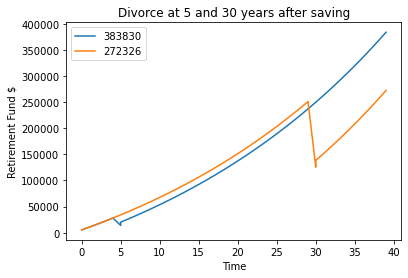

In [69]:
lex = retirement(0,.005,40,70000,.1)
lex.get_contributions()
lex.update(divorce_age=5)
eve = retirement(0,.005,40,70000,.1)
eve.get_contributions()
eve.update(divorce_age=30)
plt.title("Divorce at 5 and 30 years after saving");

From this we can see that ideally you want to get divorced relativley early after starting youre retirement fund. Obvisouly people don't have control over when they get divorced, but this shows the impact that time. The difference between getting a divorce 5 years after saving and 30 years is about 110,000.

Next I wanted to see how time affected when you bought a house and your retirement fund. To do this I again created two identical objects, but the only thing that changed was when they chose to take out money for their down payment on their house. 

387835.8966678372
387835.8966678372


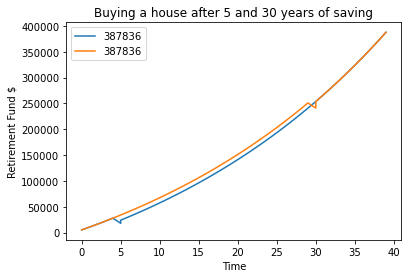

In [68]:
ace = retirement(0,.005,40,70000,.1)
ace.get_contributions()
ace.update(house_age=5,down_payment=10000)
leo = retirement(0,.005,40,70000,.1)
leo.get_contributions()
leo.update(house_age=30,down_payment=10000)
plt.title("Buying a house after 5 and 30 years of saving");

This result was very surprising. Time doesn't have an affect on your retirement fund, in the respect to when you should buy a house. For both of these cases the ending retirement fund was 387,835 even though one bought a house 5 years after saving and the other did it 30 years after saving. 

Next I will be looking at how the size of a down payment is going to effect a retirement fund.

387835.8966678372
347835.8966678372


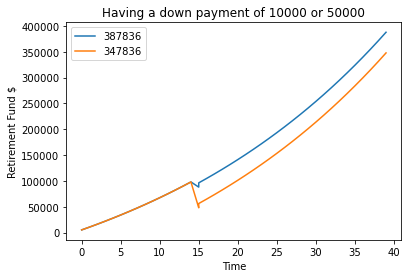

In [70]:
sky = retirement(0,.005,40,70000,.1)
sky.get_contributions()
sky.update(house_age=15,down_payment=10000)
lou = retirement(0,.005,40,70000,.1)
lou.get_contributions()
lou.update(house_age=15,down_payment=50000)
plt.title("Having a down payment of 10000 or 50000");

This result was also interesting. The retirement fund only decreased by how much was taken out for the down payment. I originally thought that taking out more money would have a bigger impact because then there would be less money that would be affected by interest. That either isn't the case or the interest is so low in this case that it doesn't matter. 

Next I wanted to look at how being unemplyed effects a retirement fund. 

363700.3327074274
329345.6618282052


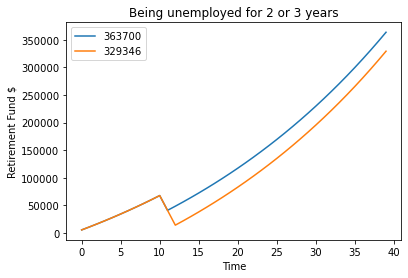

In [71]:
ray = retirement(0,.005,40,70000,.1)
ray.get_contributions()
ray.update(unemployment_start=10,unemployment_end=12,yearly_cost=26832) #I got the yearly cost by multiplying the
#cost living for a single person in michigan (2236) by 12 
sid = retirement(0,.005,40,70000,.1)
sid.get_contributions()
sid.update(unemployment_start=10,unemployment_end=13,yearly_cost=26832) #I got the yearly cost by multiplying the
#cost living for a single person in michigan (2236) by 12 
plt.title("Being unemployed for 2 or 3 years");

From the graph above can see that the only difference is that one was unemployed for a longer period of time. And as I expected that would mean that the one who was unemployed longer would have a smaller retirement fund in the end.

363700.3327074274
359625.18199245905


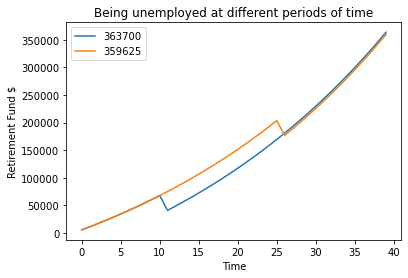

In [75]:
tim = retirement(0,.005,40,70000,.1)
tim.get_contributions()
tim.update(unemployment_start=10,unemployment_end=12,yearly_cost=26832)
dex = retirement(0,.005,40,70000,.1)
dex.get_contributions()
dex.update(unemployment_start=25,unemployment_end=27,yearly_cost=26832) #I got the yearly cost by multiplying the
#cost living for a single person in michigan (2236) by 12 
plt.title("Being unemployed at different periods of time");

 The only difference between these two people is that they were unemployed at different periods of their life. The person who was unemployed later in life had a larger effect on their retirement fund. This is interesting because the time you bought a house didn't have an effect on your ending funds, but the time you are unemplued in your life does. 

## Results

Retirement is scary, so we try to start saving for it way in advance. It would be naive of us to think that we aren't going to run into life complications that result in us having to pull from our retirement fund. I think that it is important for us to know the consequences of that decision. In this project I found that being unemployed for an extended period of time effects your retirement fund the most. This makes sense because, during that time you can't contribute to your retirement fund and you are withdrawing from it. I also found that the time you buy a house after you start saving doesn't matter. My next finding was, getting a divorce earlier in life is better than later. We can't really control this, but it is something to note. It also makes sense because you are taking a portion of a bigger savings if you get divorced later in life. And finally, I found that the ammount you take out for a down payment doesn't have an effect on your retirement fund other than the fact that you took out more money. I originally thought that taking out more money would have a bigger impact because  there would be less interest that could be applied to your savings account. 

## Discussion and Conclusion

This project was really interesting because there were a lot of portions that I thought I knew the outcome, but was shocked when the results turned out to be the opposite of what I had expected. The hardest part about this project was trying to incorporate time, and make it so that a single person could undergo each of the situations (divorce, unemployment, and buying a house). At first I didn't take into account that these things could happen to a single person, so when I ran multiple situations on one person I would get out a retirement fund list that was way too long. On top of that sometimes the time list would start over after someone went through a situation, which isn't accurate. The way that I fixed this was by creating all of the situations by themselves and then including an update function in the end that tied it all together. 

Next time I think I would like to go further with my questions and ask, if someone has to take money out of their retirement fund, what are ways that they could recover from that? The answers would be investing, buying bonds, saving more of their income.  Then I would ask what one of those options is the best? I would have to extend my class to be able to model each of those things. Again I would graph out the retirement fund over time in order to see a difference in their growths. 

## References

Nancy Mann Jackson, special to CNBC.com. “Is It Ever a Good Idea to Tap into Your 401(k) Early?” CNBC, CNBC, 26 Feb. 2015, https://www.cnbc.com/2015/02/25/top-reasons-for-early-retirement-account-withdrawals.html#:~:text=1%20Emergency%20financial%20needs.%20When%20you%20experience%20a,it%E2%80%99s%20important%20to%20carefully%20weigh%20the%20opportunity%20costs. 
“Cost of Living in United States.” Expatistan, Cost of Living Comparisons, https://www.expatistan.com/cost-of-living/country/united-states#:~:text=Summary%20of%20cost%20of%20living%20in%20United%20States,costs%3A%20%245%2C135%20Single%20person%20estimated%20monthly%20costs%3A%20%243%2C019. 
“Ira Account.” TD Ameritrade, https://www.tdameritrade.com/retirement-planning/retirement-suite.html?TID=NA&s_kwcid=AL%212521%2110%2181501362776942%2125142418547&ef_id=fbf9868a0bcc16427c89e4fe8a82787f%3AG%3As&CID=PSIRA. 